In [1]:
from scipy.optimize import newton

# Dados do problema
PV = 37500  # valor financiado (75% de 50.000)
PMT = 999   # valor da parcela
n = 48      # número de parcelas

# Função para calcular o valor presente de uma anuidade com taxa i
def f(i):
    return PMT * (1 - (1 + i)**-n) / i - PV

# Estimativa inicial (1% ao mês)
i_inicial = 0.01

# Calcular a taxa de juros usando o método de Newton-Raphson
taxa_juros_mensal = newton(f, i_inicial)

# Converter para percentual
taxa_percentual = taxa_juros_mensal * 100

print(f"Taxa de juros mensal aproximada: {taxa_percentual:.4f}%")


Taxa de juros mensal aproximada: 1.0518%


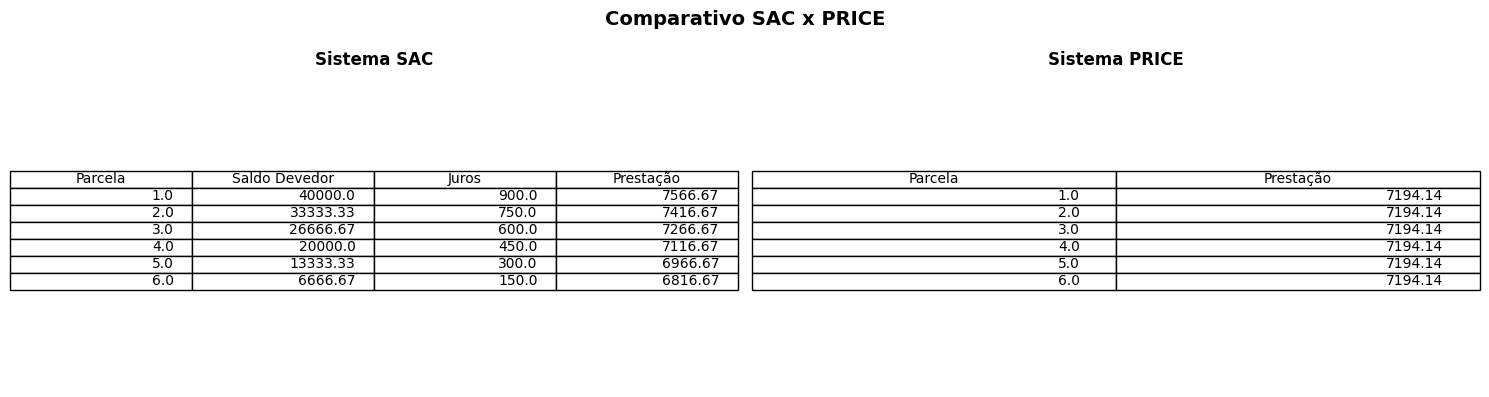

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados para SAC
sac_amort = 40000 / 6
sac_juros = [40000 * 0.0225, 33333.33 * 0.0225, 26666.67 * 0.0225, 
             20000 * 0.0225, 13333.33 * 0.0225, 6666.67 * 0.0225]
sac_prest = [sac_amort + j for j in sac_juros]
sac_data = {
    'Parcela': list(range(1, 7)),
    'Saldo Devedor': [40000, 33333.33, 26666.67, 20000, 13333.33, 6666.67],
    'Juros': sac_juros,
    'Prestação': sac_prest
}
df_sac = pd.DataFrame(sac_data)

# Dados para PRICE
# Cálculo da prestação
i = 0.0222
n = 6
PV = 40000
fator = (i * (1 + i)**n) / ((1 + i)**n - 1)
pmt_price = PV * fator
price_data = {
    'Parcela': list(range(1, 7)),
    'Prestação': [round(pmt_price, 2)] * 6
}
df_price = pd.DataFrame(price_data)

# Plotando as tabelas lado a lado
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle("Comparativo SAC x PRICE", fontsize=14, fontweight='bold')

# Tabela SAC
axes[0].axis('tight')
axes[0].axis('off')
axes[0].table(cellText=df_sac.round(2).values, colLabels=df_sac.columns, loc='center')
axes[0].set_title('Sistema SAC', fontweight='bold')

# Tabela PRICE
axes[1].axis('tight')
axes[1].axis('off')
axes[1].table(cellText=df_price.values, colLabels=df_price.columns, loc='center')
axes[1].set_title('Sistema PRICE', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
%pip install jinja2

import pandas as pd
from IPython.display import display_html

# Dados para SAC
sac_amort = 40000 / 6
sac_saldos = [40000, 33333.33, 26666.67, 20000, 13333.33, 6666.67]
sac_juros = [round(saldo * 0.0225, 2) for saldo in sac_saldos]
sac_prest = [round(sac_amort + juros, 2) for juros in sac_juros]

df_sac = pd.DataFrame({
    'Parcela': range(1, 7),
    'Saldo Devedor': sac_saldos,
    'Juros': sac_juros,
    'Amortização': round(sac_amort, 2),
    'Prestação': sac_prest
})

# Dados para PRICE
i = 0.0222
n = 6
PV = 40000
fator = (i * (1 + i)**n) / ((1 + i)**n - 1)
pmt_price = PV * fator

# Para calcular saldo, juros e amortização em PRICE mês a mês:
saldo_price = PV
price_juros = []
price_amort = []
price_saldos = [saldo_price]

for _ in range(n):
    juros_mes = round(saldo_price * i, 2)
    amort_mes = round(pmt_price - juros_mes, 2)
    saldo_price = round(saldo_price - amort_mes, 2)
    
    price_juros.append(juros_mes)
    price_amort.append(amort_mes)
    price_saldos.append(saldo_price)

df_price = pd.DataFrame({
    'Parcela': range(1, 7),
    'Saldo Devedor': price_saldos[:-1],
    'Juros': price_juros,
    'Amortização': price_amort,
    'Prestação': [round(pmt_price, 2)] * n
})

# Exibir lado a lado no notebook
display_html(df_sac.style.set_caption('Sistema SAC').render() + df_price.style.set_caption('Sistema PRICE').render(), raw=True)


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.